In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.loadtxt('dataset-rapport/x1.txt')
x2 = np.loadtxt('dataset-rapport/x2.txt')
x3 = np.loadtxt('dataset-rapport/x3.txt')
x4 = np.loadtxt('dataset-rapport/x4.txt')
y1 = np.loadtxt('dataset-rapport/y1.txt')
zz1 = np.loadtxt('dataset-rapport/zz1.txt')
zz2 = np.loadtxt('dataset-rapport/zz2.txt')

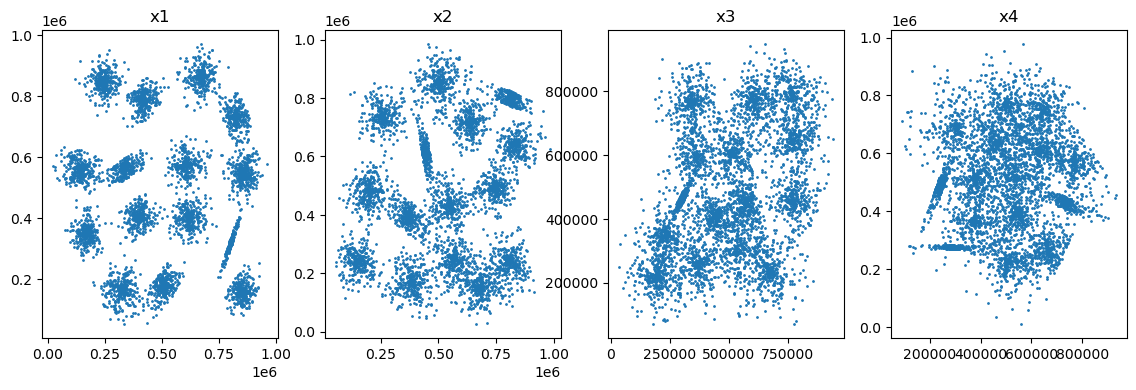

In [2]:
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
plt.title('x1')
plt.scatter(x1[:,0],x1[:,1],s=1)
plt.subplot(1,4,2)
plt.title('x2')
plt.scatter(x2[:,0],x2[:,1],s=1)
plt.subplot(1,4,3)
plt.title('x3')
plt.scatter(x3[:,0],x3[:,1],s=1)
plt.subplot(1,4,4)
plt.title('x4')
plt.scatter(x4[:,0],x4[:,1],s=1)

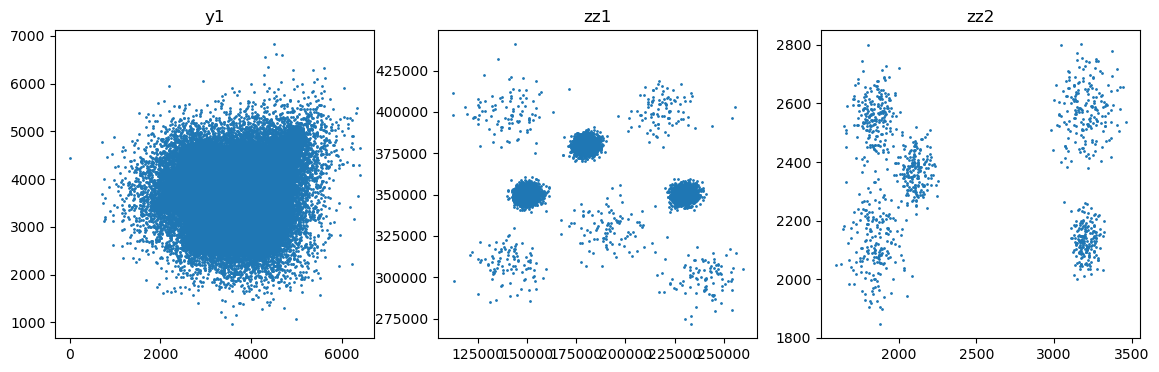

In [3]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title('y1')
plt.scatter(y1[:,0],y1[:,1],s=1)
plt.subplot(1,3,2)
plt.title('zz1')
plt.scatter(zz1[:,0],zz1[:,1],s=1)
plt.subplot(1,3,3)
plt.title('zz2')
plt.scatter(zz2[:,0],zz2[:,1],s=1)

In [5]:
from sklearn import cluster
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances
import kmedoids

def cluster_kmeans(data, n_clusters, plot=True):
    model = cluster.KMeans(n_clusters=n_clusters, init='k-means++')
    model.fit(data)
    if plot:
        plt.scatter(data[:, 0], data[:, 1], s=1, c=model.labels_)
        plt.show()
    return silhouette_score(data, model.labels_), \
        davies_bouldin_score(data, model.labels_), \
        calinski_harabasz_score(data, model.labels_)

def cluster_kmedoids(data, n_clusters, plot=True):
    dist_matrix = euclidean_distances(data)
    model = kmedoids.fasterpam(dist_matrix,n_clusters)
    if plot:
        plt.scatter(data[:, 0], data[:, 1], s=1, c=model.labels)
        plt.show()
    return silhouette_score(data, model.labels), \
        davies_bouldin_score(data, model.labels), \
        calinski_harabasz_score(data, model.labels)

def print_metrics(arg_range,silhouettes,dbs,chs) :
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.title('Silhouette score')
    plt.plot(arg_range,silhouettes)
    plt.subplot(1,3,2)
    plt.title('DB score')
    plt.plot(arg_range,dbs)
    plt.subplot(1,3,3)
    plt.title('CH score')
    plt.plot(arg_range,chs)
    plt.show()

def kmeans_print_metrics(data, k_range):
    silhouettes = []
    dbs = []
    chs = []
    for K in k_range:
        sil, db, ch = cluster_kmeans(data, K, plot=False)
        silhouettes.append(sil)
        dbs.append(db)
        chs.append(ch)
    print_metrics(k_range,silhouettes,dbs,chs)

def kmedoids_print_metrics(data, k_range):
    silhouettes = []
    dbs = []
    chs = []
    for K in k_range:
        sil, db, ch = cluster_kmedoids(data, K, plot=False)
        silhouettes.append(sil)
        dbs.append(db)
        chs.append(ch)
    print_metrics(k_range,silhouettes,dbs,chs)

KMeans


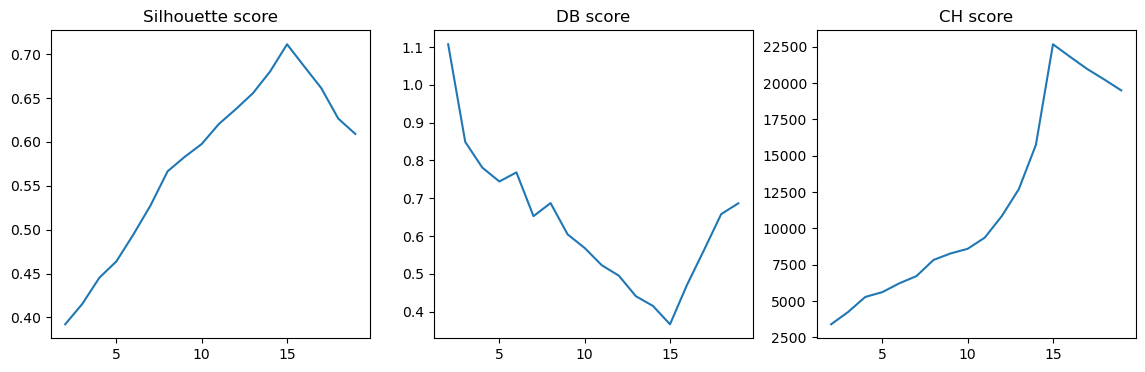

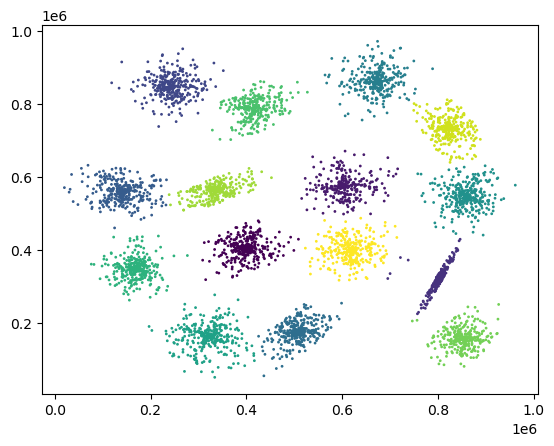

KMedoids


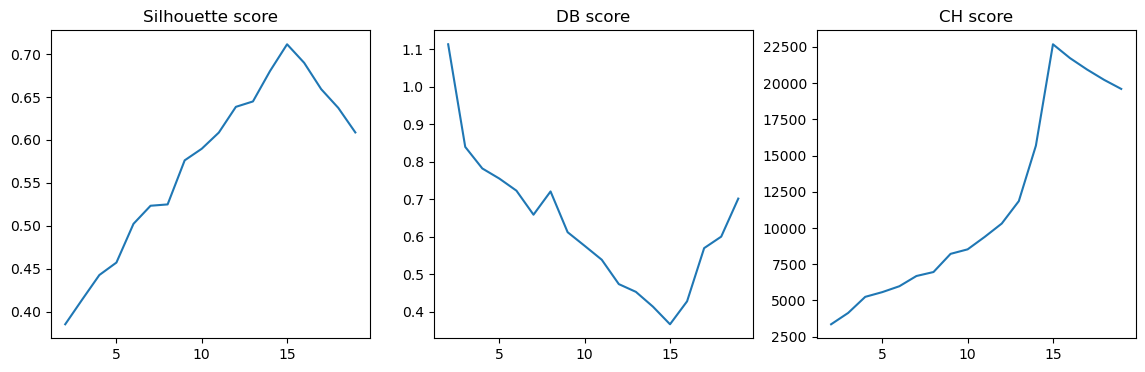

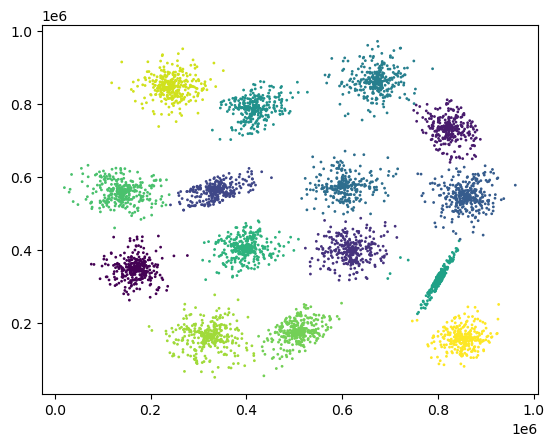

(0.7112850946981214, 0.366208646687125, 22674.606167199447)

In [6]:
print('KMeans')
kmeans_print_metrics(x1,range(2,20))
cluster_kmeans(x1,15)
print('KMedoids')
kmedoids_print_metrics(x1,range(2,20))
cluster_kmedoids(x1,15)

KMeans


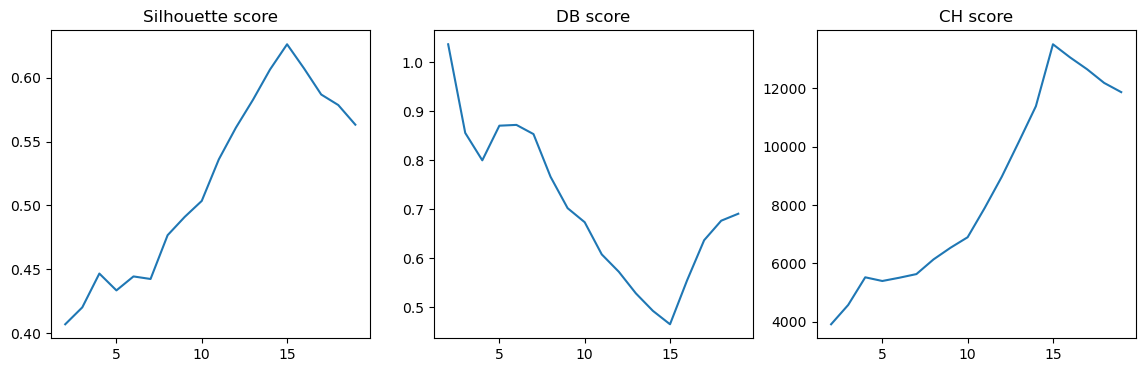

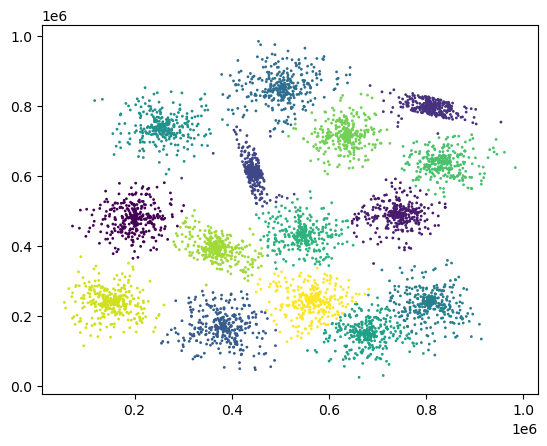

KMedoids


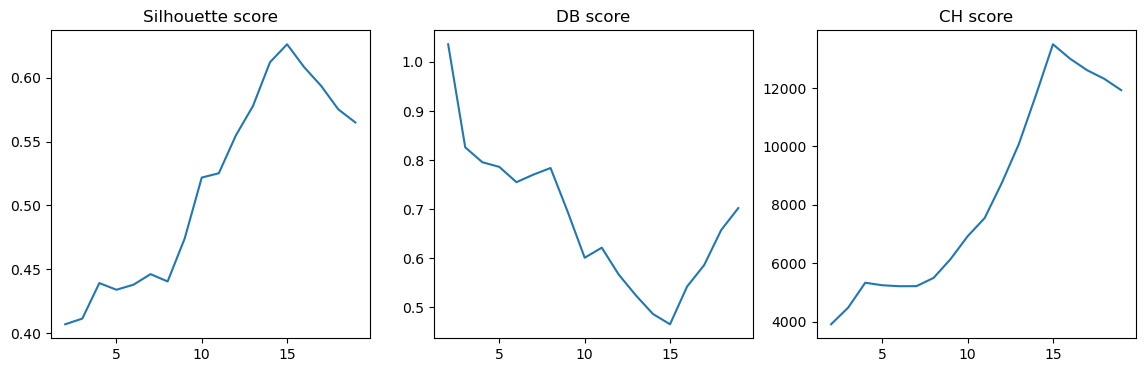

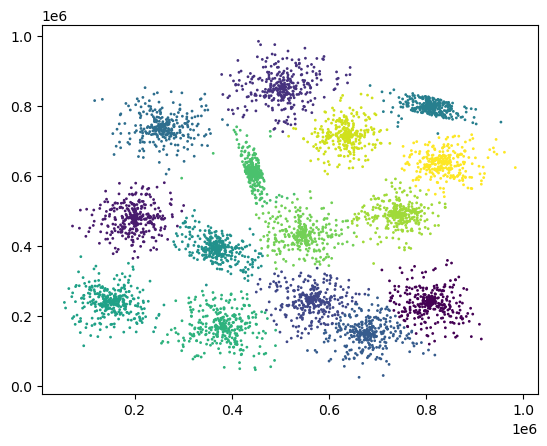

(0.6262497223493663, 0.46576256162136764, 13501.333151854633)

In [7]:
print('KMeans')
kmeans_print_metrics(x2,range(2,20))
cluster_kmeans(x2,15)
print('KMedoids')
kmedoids_print_metrics(x2,range(2,20))
cluster_kmedoids(x2,15)

KMeans


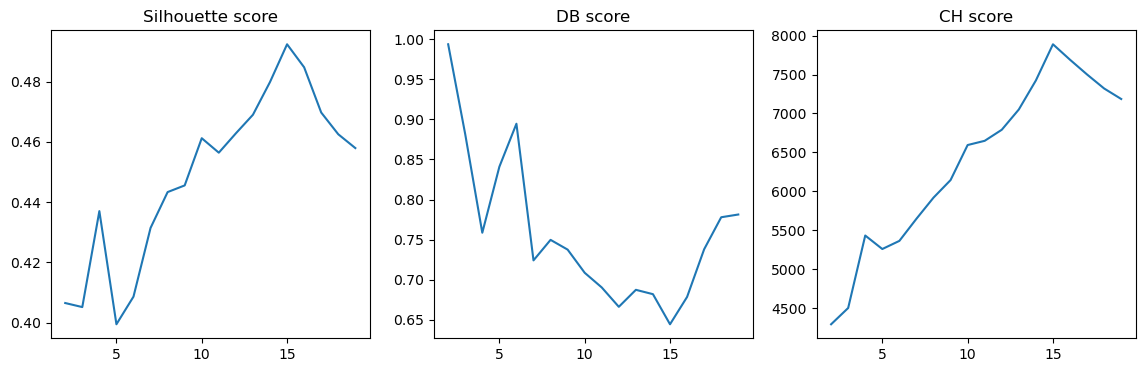

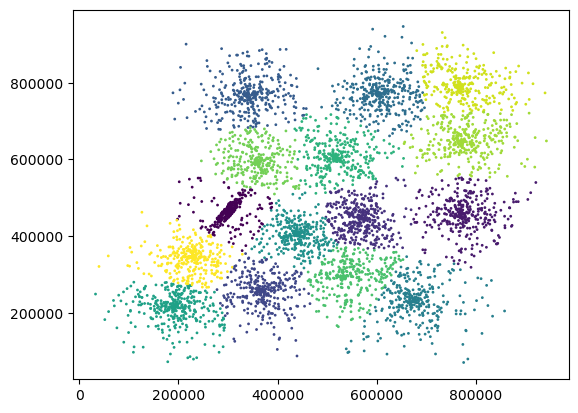

KMedoids


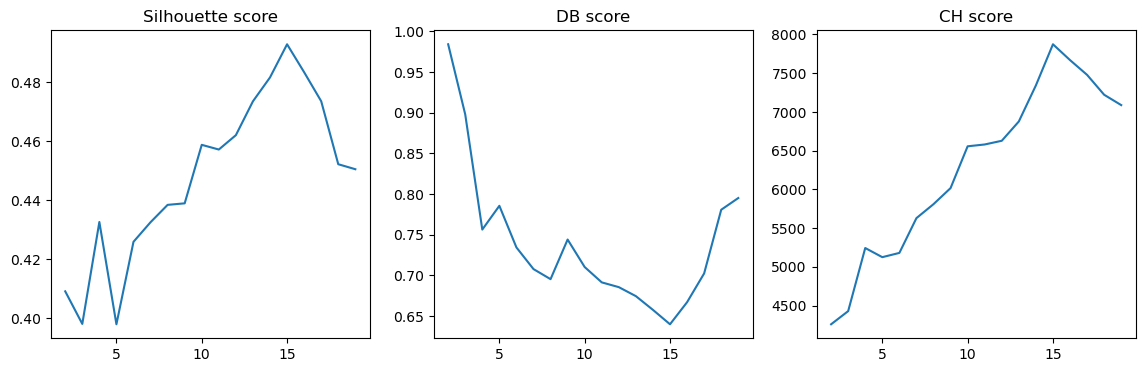

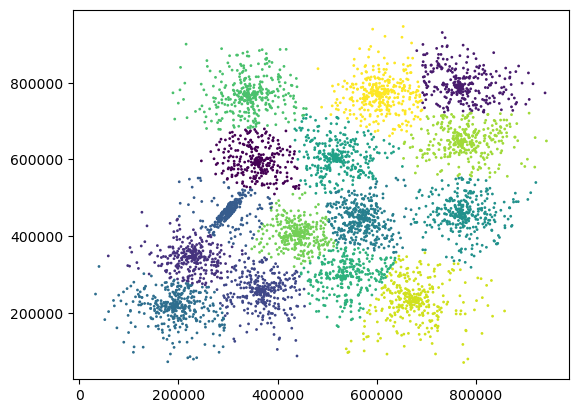

(0.49284747586196753, 0.6399357717117691, 7873.77795413297)

In [8]:
print('KMeans')
kmeans_print_metrics(x3,range(2,20))
cluster_kmeans(x3,15)
print('KMedoids')
kmedoids_print_metrics(x3,range(2,20))
cluster_kmedoids(x3,15)

KMeans


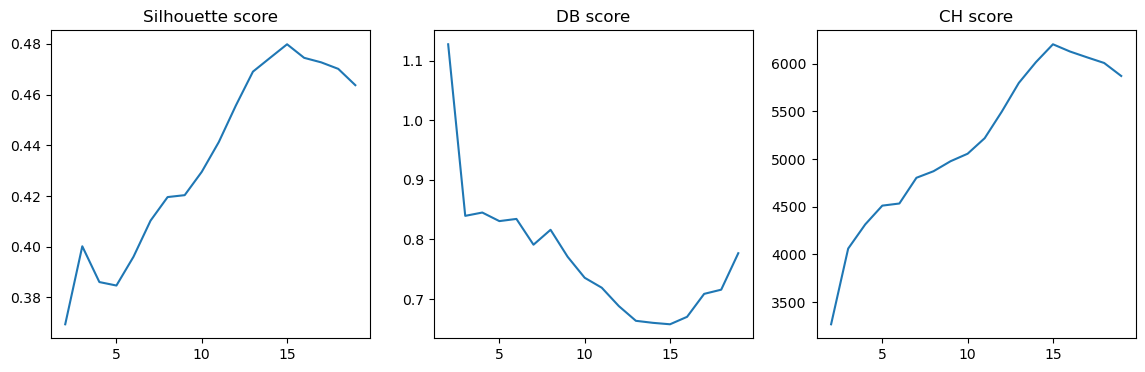

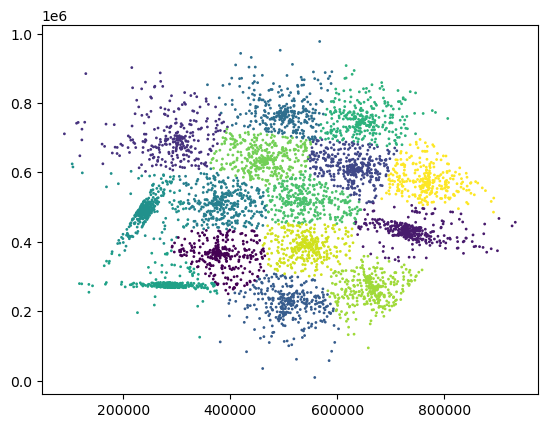

KMedoids


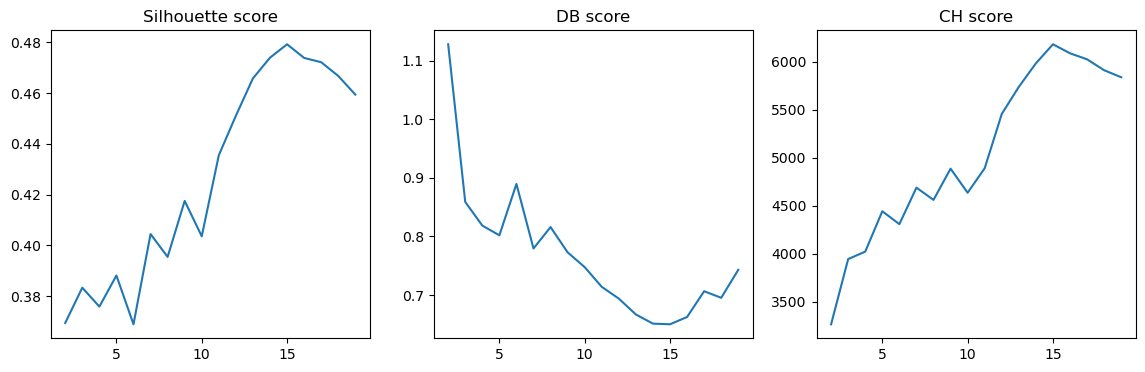

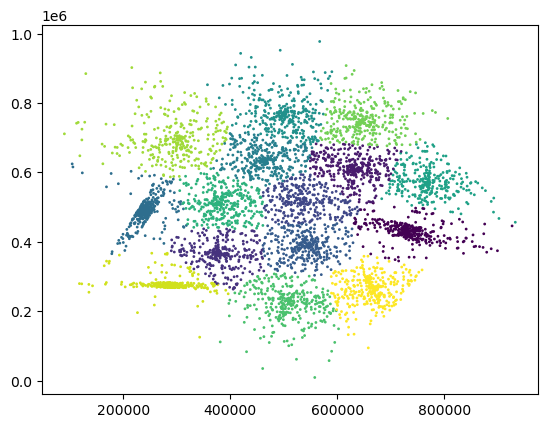

(0.47922225445340616, 0.6502067662762193, 6180.542256227133)

In [9]:
print('KMeans')
kmeans_print_metrics(x4,range(2,20))
cluster_kmeans(x4,15)
print('KMedoids')
kmedoids_print_metrics(x4,range(2,20))
cluster_kmedoids(x4,15)

In [6]:
def cluster_agglomerative(data, linkage, n_clusters, affinity='euclidean', plot=True):
    model = cluster.AgglomerativeClustering(n_clusters, affinity=affinity, linkage=linkage)
    model = model.fit(data)
    labels = model.labels_

    data_f0 = data[:,0]
    data_f1 = data[:,1]

    if plot :
        plt.scatter(data_f0, data_f1, c=labels, s=1)
        plt.title(" Agglomerative clustering ")
        plt.show()

    return silhouette_score(data, model.labels_), \
        davies_bouldin_score(data, model.labels_), \
        calinski_harabasz_score(data, model.labels_)

def agglomerative_print_metrics(data, k_range, linkage='average', affinity='euclidean'):
    silhouettes = []
    dbs = []
    chs = []
    for K in k_range:
        sil, db, ch = cluster_agglomerative(data, linkage, K, affinity, plot=False)
        silhouettes.append(sil)
        dbs.append(db)
        chs.append(ch)
    print_metrics(k_range,silhouettes,dbs,chs)

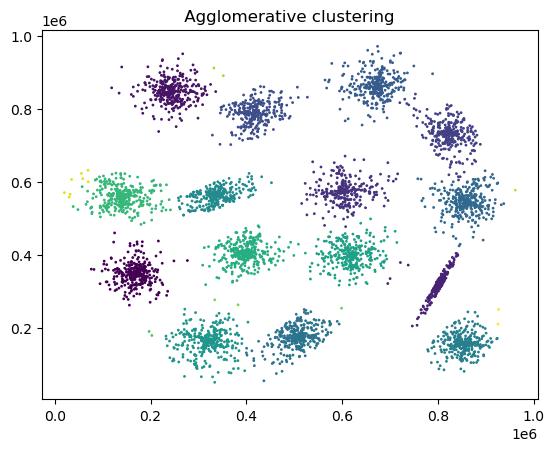

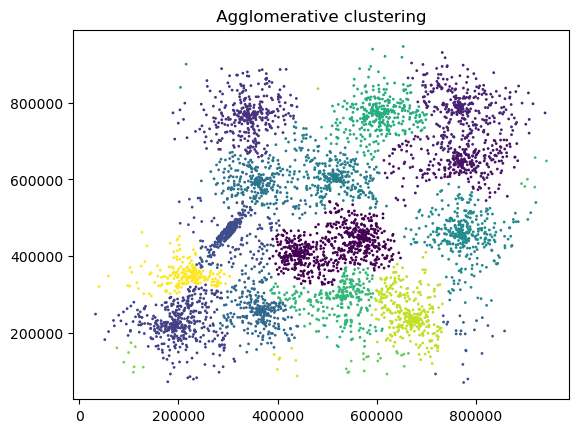

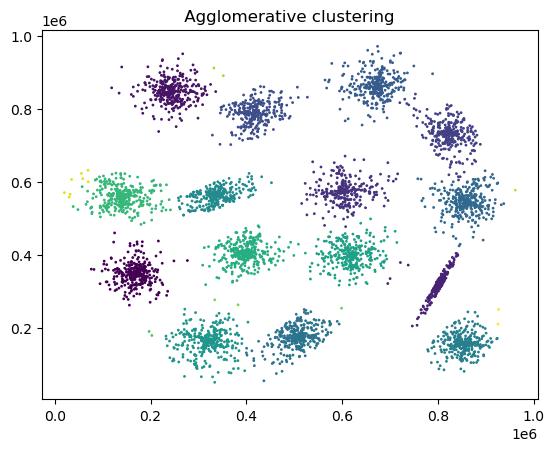

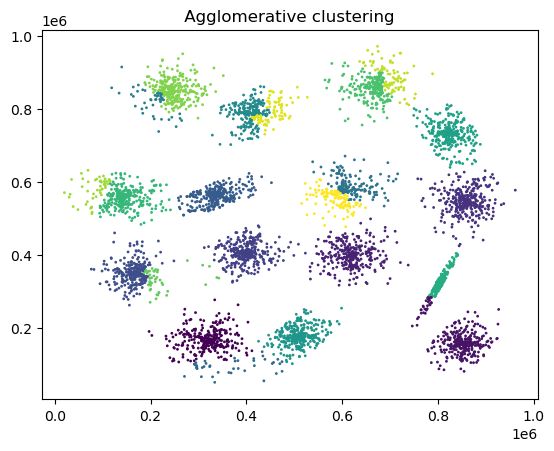

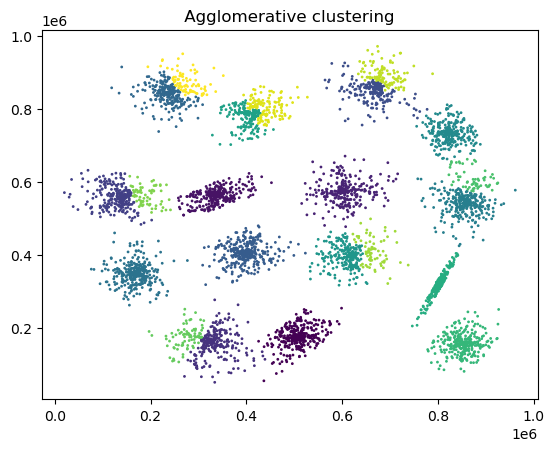

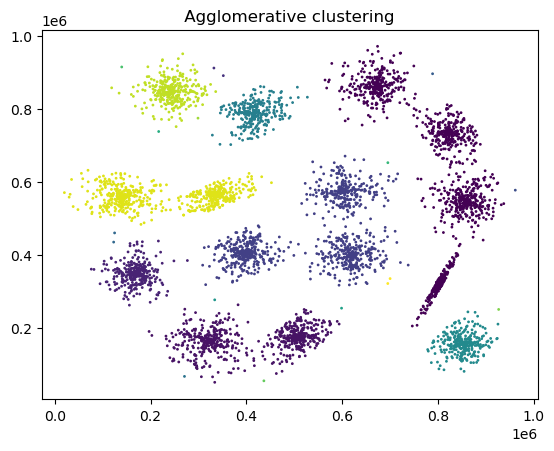

(-0.051403783487772935, 0.7825920158213548, 1135.158733685097)

In [11]:
k = 22
cluster_agglomerative(x1,'average', k, affinity='euclidean')
cluster_agglomerative(x3,'average', k, affinity='euclidean')

cluster_agglomerative(x1,'average', k, affinity='euclidean')
cluster_agglomerative(x1,'complete', k, affinity='euclidean')
cluster_agglomerative(x1,'ward', k, affinity='euclidean')
cluster_agglomerative(x1,'single', k, affinity='euclidean')


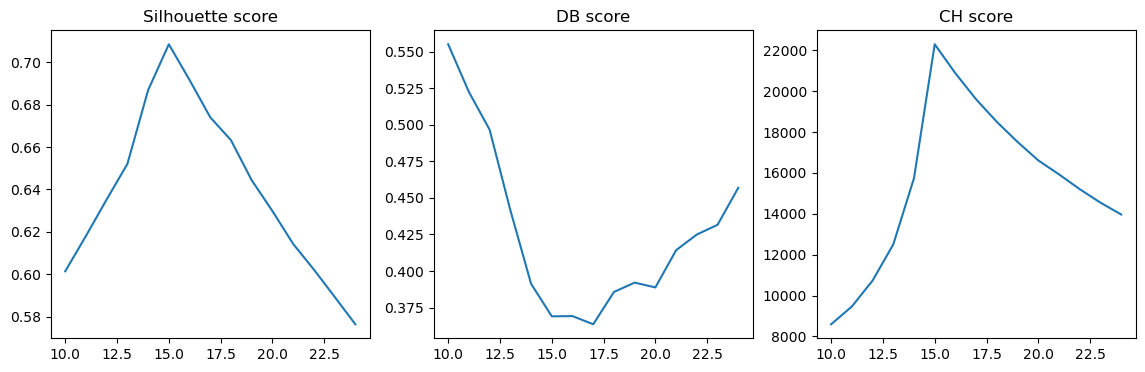

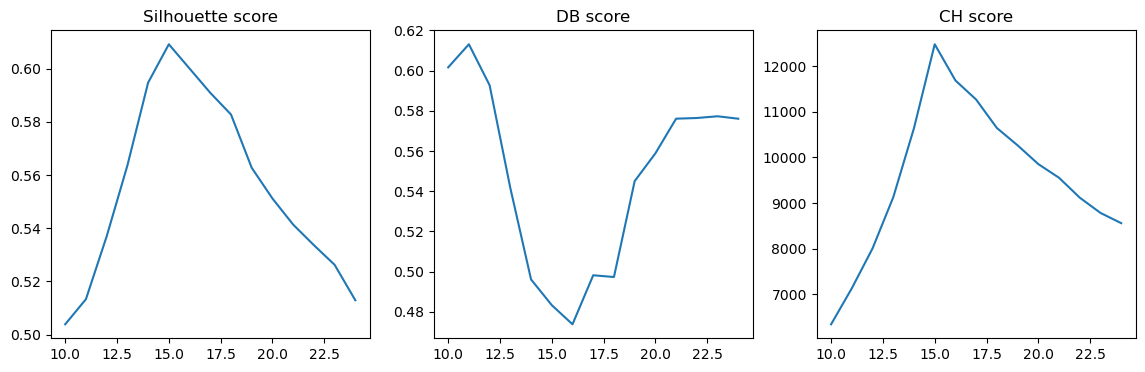

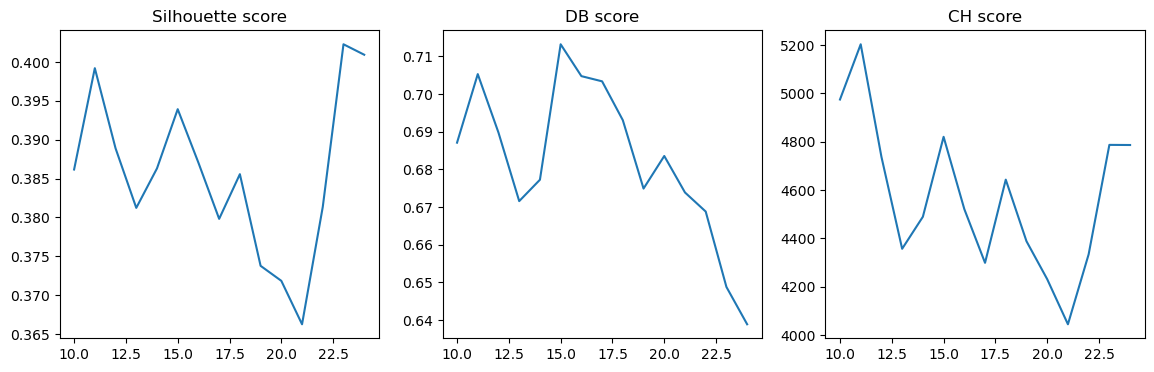

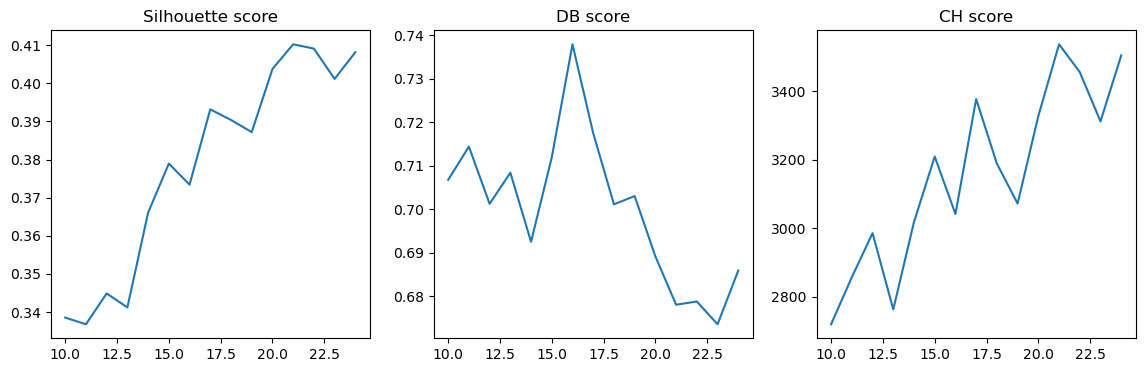

In [12]:
agglomerative_print_metrics(x1,range(10,25))
agglomerative_print_metrics(x2,range(10,25))
agglomerative_print_metrics(x3,range(10,25))
agglomerative_print_metrics(x4,range(10,25))

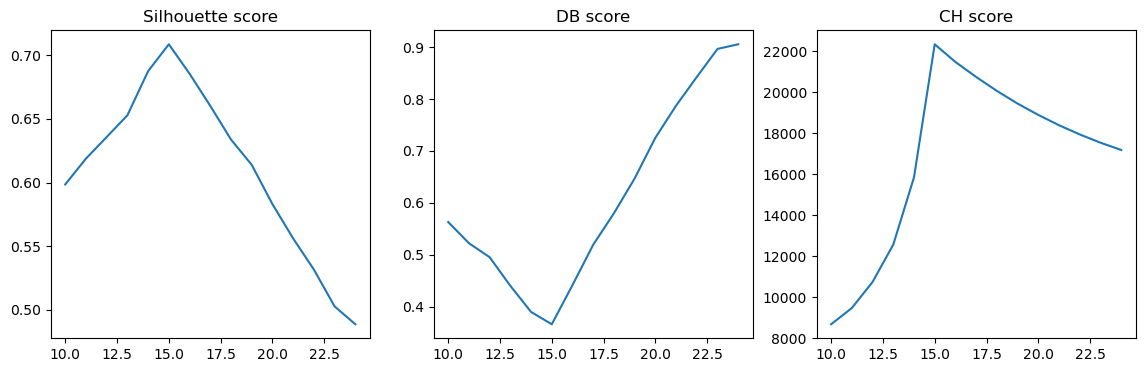

KeyboardInterrupt: 

In [13]:
agglomerative_print_metrics(x1, range(10,25), linkage='ward')
agglomerative_print_metrics(x2,range(10,25), linkage='ward')
agglomerative_print_metrics(x3,range(10,25), linkage='ward')
agglomerative_print_metrics(x4,range(10,25), linkage='ward')

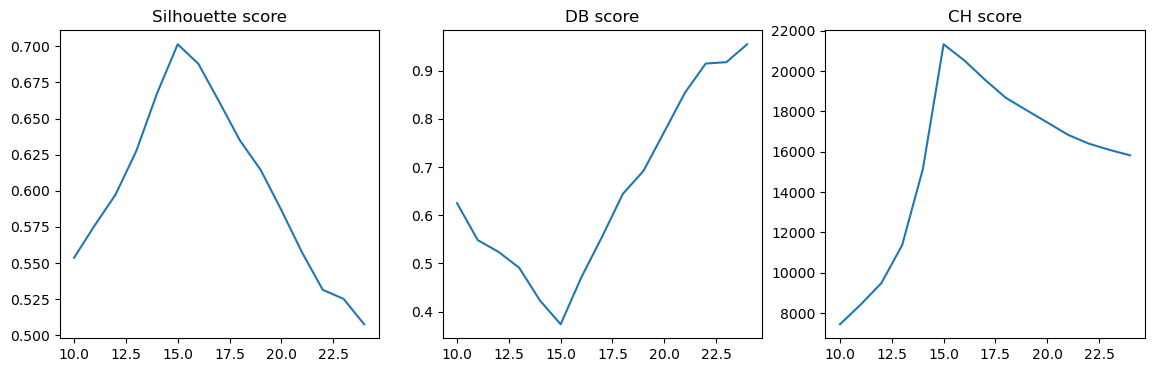

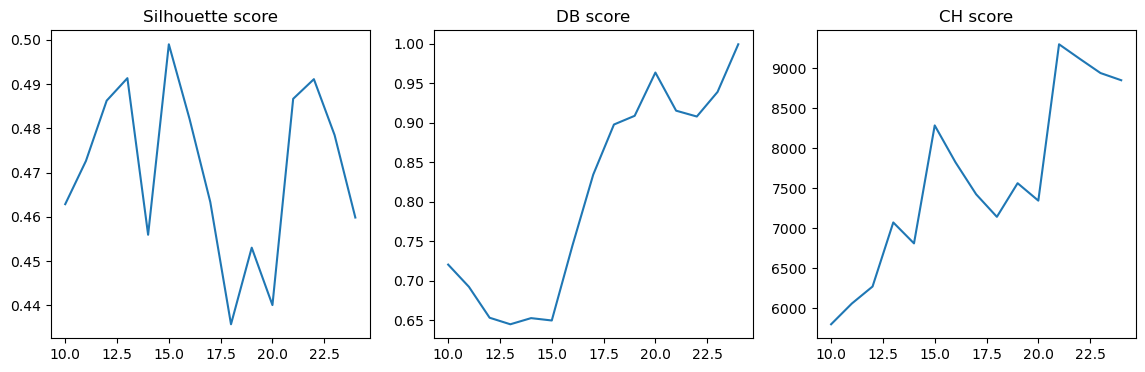

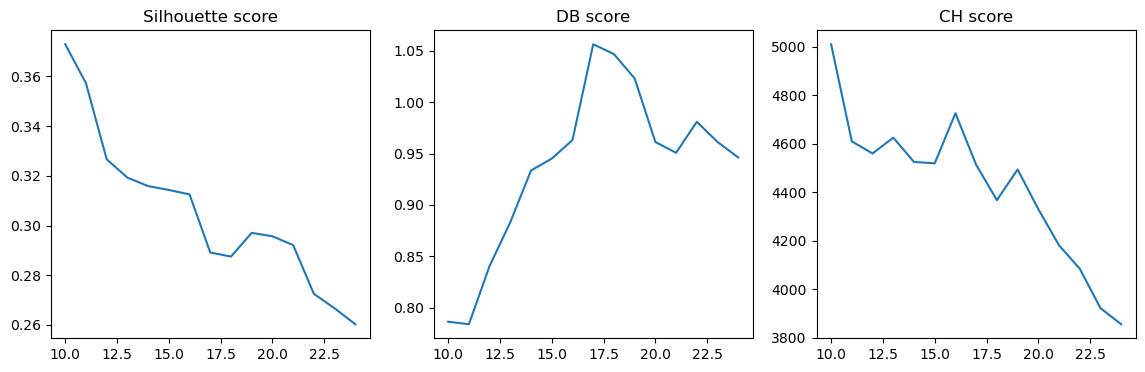

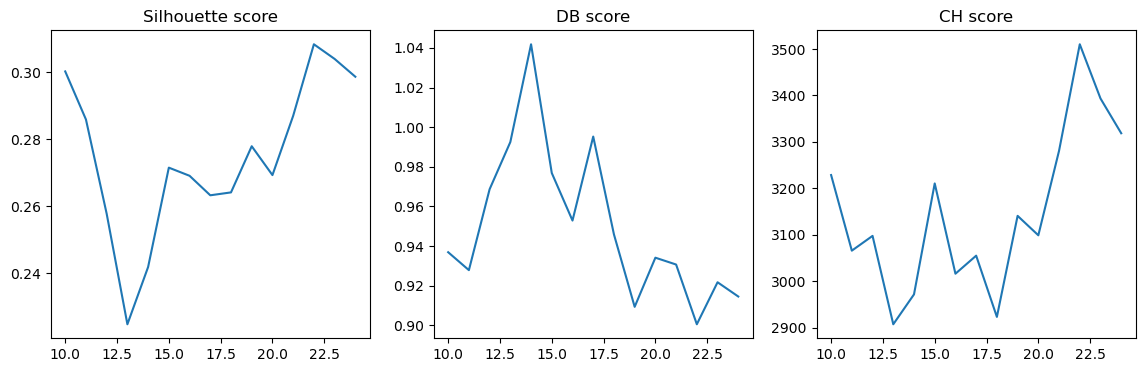

In [ ]:
agglomerative_print_metrics(x1, range(10,25), linkage='complete')
agglomerative_print_metrics(x2,range(10,25), linkage='complete')
agglomerative_print_metrics(x3,range(10,25), linkage='complete')
agglomerative_print_metrics(x4,range(10,25), linkage='complete')

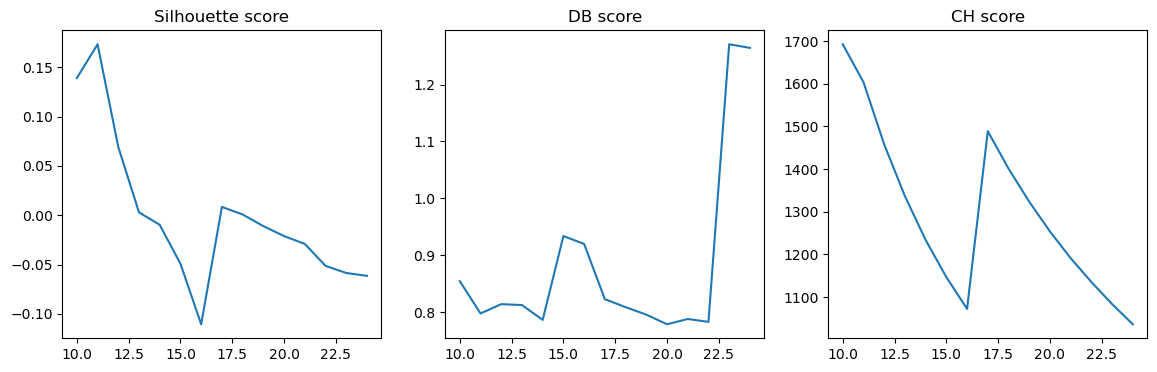

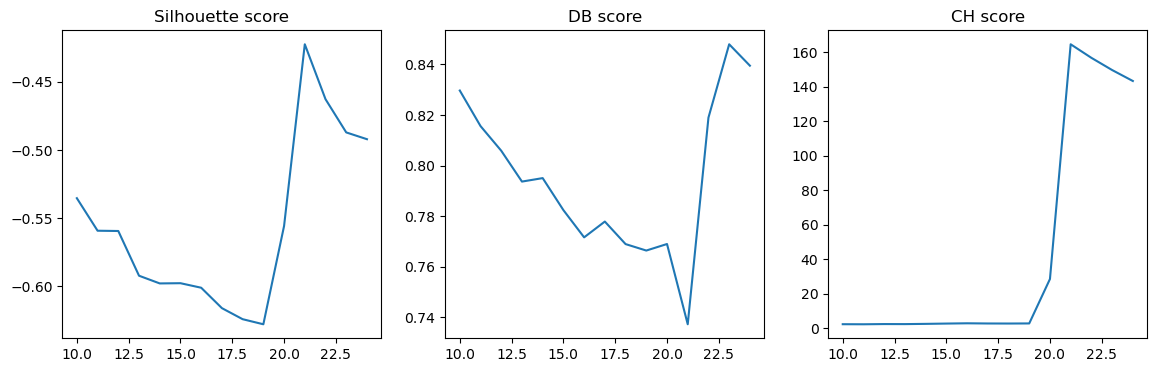

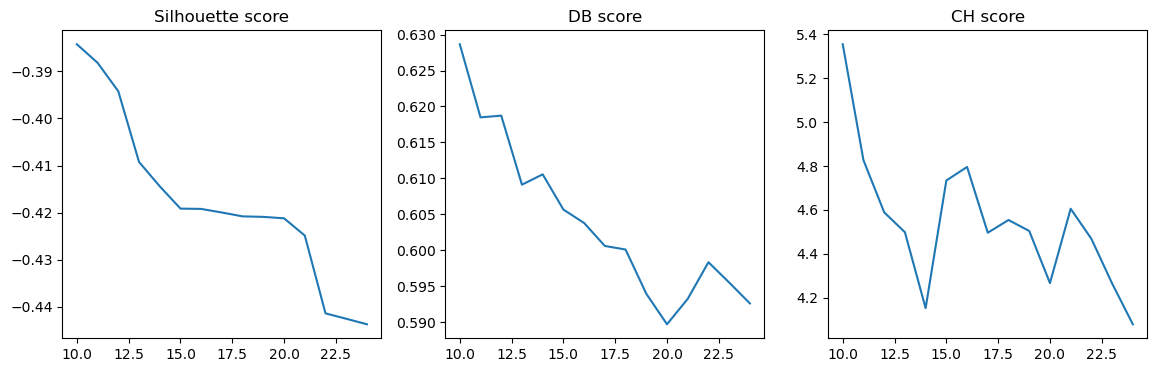

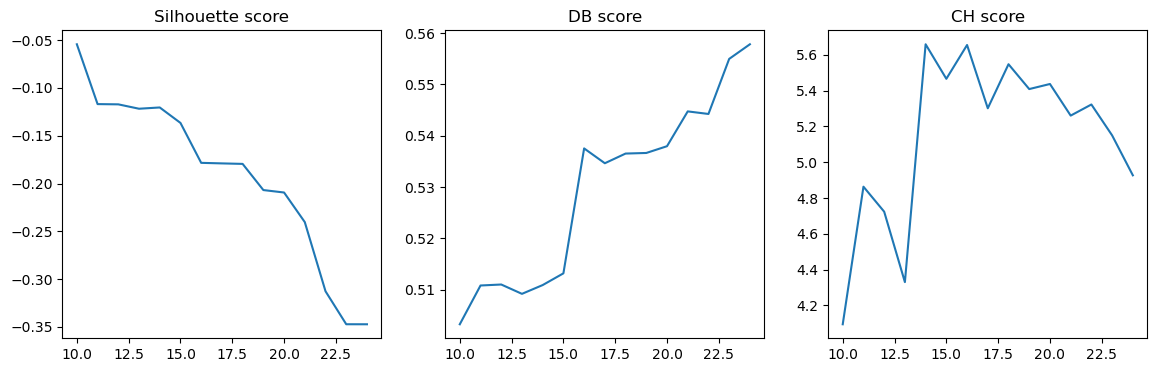

In [ ]:
agglomerative_print_metrics(x1, range(10,25), linkage='single')
agglomerative_print_metrics(x2,range(10,25), linkage='single')
agglomerative_print_metrics(x3,range(10,25), linkage='single')
agglomerative_print_metrics(x4,range(10,25), linkage='single')

In [37]:
def cluster_DBSCAN(data, eps, min_samples, plot=True, return_scores=True):
    model = cluster.DBSCAN(eps=eps, min_samples=min_samples)
    model = model.fit(data)
    labels = model.labels_

    data_f0 = data[:,0]
    data_f1 = data[:,1]

    if plot : 
        plt.scatter(data_f0, data_f1, c=labels, s=1)
        plt.title(" DBSCAN ")
        plt.show()

    if return_scores :
        return silhouette_score(data, model.labels_), \
            davies_bouldin_score(data, model.labels_), \
            calinski_harabasz_score(data, model.labels_)
    return labels

def DBSCAN_print_metrics(data, k_range):
    silhouettes = []
    dbs = []
    chs = []
    for K in k_range:
        sil, db, ch = cluster_DBSCAN(data, K, plot=False)
        silhouettes.append(sil)
        dbs.append(db)
        chs.append(ch)
    print_metrics(k_range,silhouettes,dbs,chs)

import hdbscan

def cluster_HDBSCAN(data, min_cluster_size, plot=True, return_scores=True):
    model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    model = model.fit(data)
    labels = model.labels_

    data_f0 = data[:,0]
    data_f1 = data[:,1]
    
    if plot : 
        plt.scatter(data_f0, data_f1, c=labels, s=1)
        plt.title(" HDBSCAN ")
        plt.show()

    if return_scores :
        return silhouette_score(data, model.labels_), \
            davies_bouldin_score(data, model.labels_), \
            calinski_harabasz_score(data, model.labels_)
    return labels

def HDBSCAN_print_metrics(data, size_range):
    silhouettes = []
    dbs = []
    chs = []
    for min_cluster_size in size_range:
        sil, db, ch = cluster_HDBSCAN(data, min_cluster_size, plot=False)
        silhouettes.append(sil)
        dbs.append(db)
        chs.append(ch)
    print_metrics(size_range,silhouettes,dbs,chs)


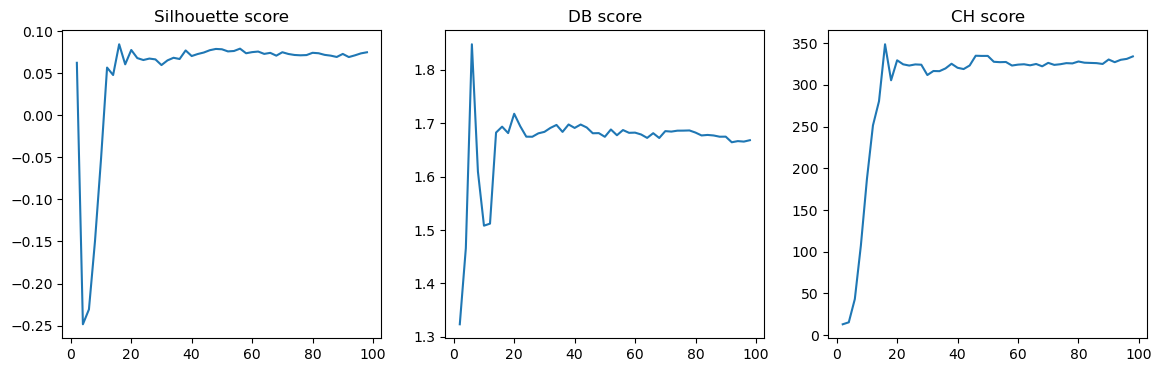

In [ ]:
HDBSCAN_print_metrics(x3, range(2,100,2))
#cluster_HDBSCAN(x1,16)
# HDBSCAN_print_metrics(x1, range(2,30,1))
# HDBSCAN_print_metrics(x1, range(2,30,1))
# HDBSCAN_print_metrics(x1, range(2,30,1))

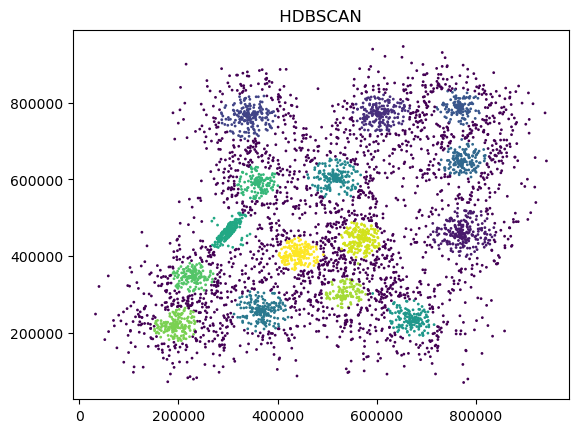

(0.07294971521101282, 1.6641144889768942, 332.4470821260511)

In [ ]:
cluster_HDBSCAN(x3,100)


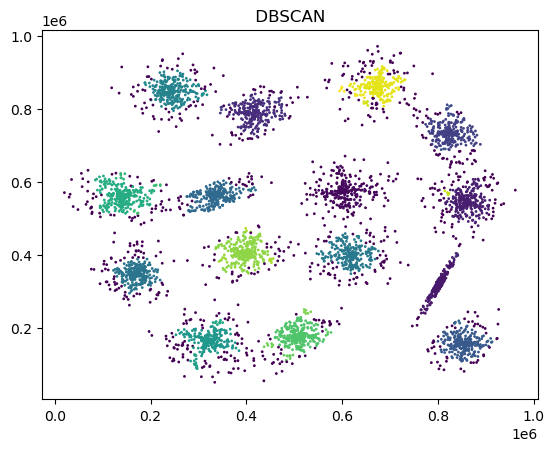

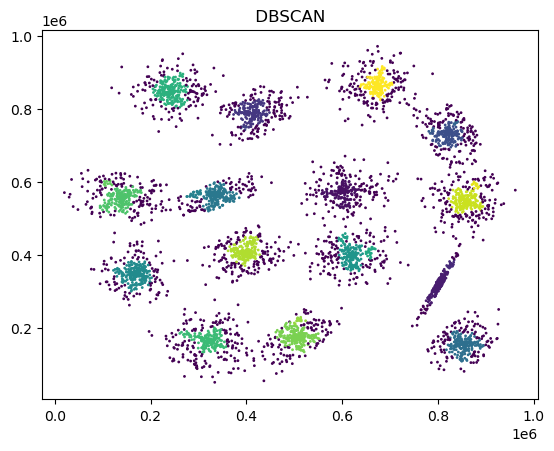

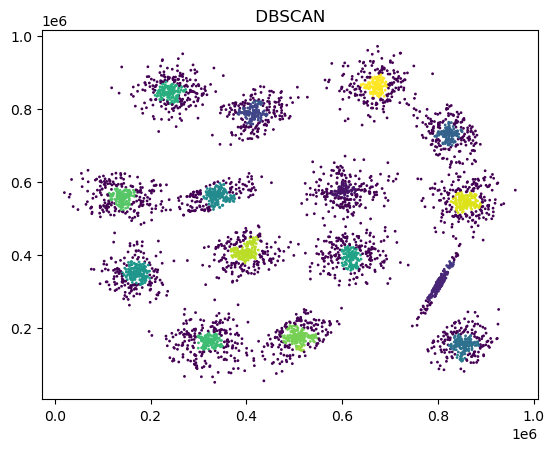

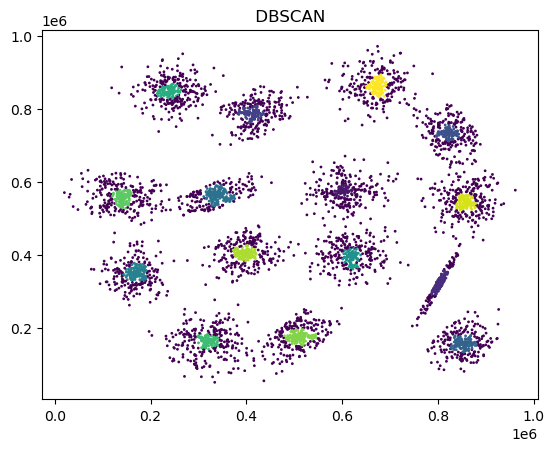

(-0.08565339939584295, 1.3773904331450633, 248.0260755390579)

In [ ]:
cluster_DBSCAN(x1,10000,5)
cluster_DBSCAN(x1,10000,10)
cluster_DBSCAN(x1,10000,15)
cluster_DBSCAN(x1,10000,20)

In [ ]:
cluster_DBSCAN(x1,7000,5)
cluster_DBSCAN(x1,9000,5)
cluster_DBSCAN(x1,11000,5)
cluster_DBSCAN(x1,13000,5)

NameError: name 'cluster_DBSCAN' is not defined

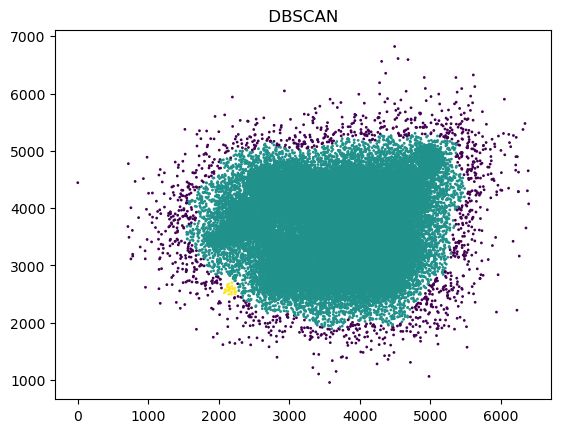

n_clusters = 3


In [49]:
# kmeans_print_metrics(y1,range(2,10))
labels = cluster_DBSCAN(y1,100,20,return_scores=False)
n_clusters = len(np.unique(labels))
print(f'n_clusters = {n_clusters}')

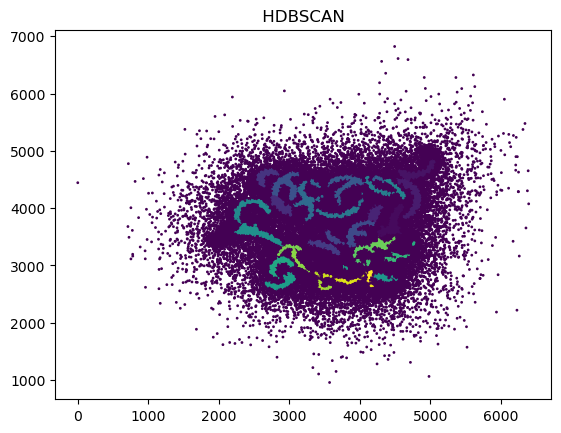

KeyboardInterrupt: 

In [50]:
labels = cluster_HDBSCAN(y1, 90)
n_clusters = len(np.unique(labels))
print(f'n_clusters = {n_clusters}')

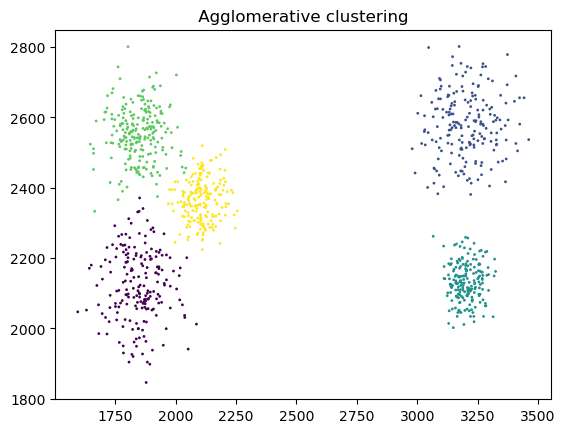

(0.632704038085479, 0.4858647845326871, 9091.42173689208)

In [75]:
cluster_agglomerative(zz2,'ward',5)

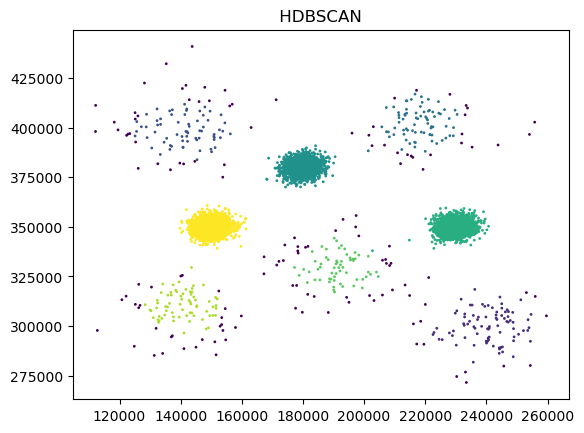

(0.8214083511337847, 1.6385154880096124, 10977.283052536284)

In [110]:
cluster_HDBSCAN(zz2,